In [3]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

In [4]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [5]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp = await fetch(URL)
dataset_part_2_csv = io.BytesIO((await resp.arrayBuffer()).to_py())
df=pd.read_csv(dataset_part_2_csv)
df.head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


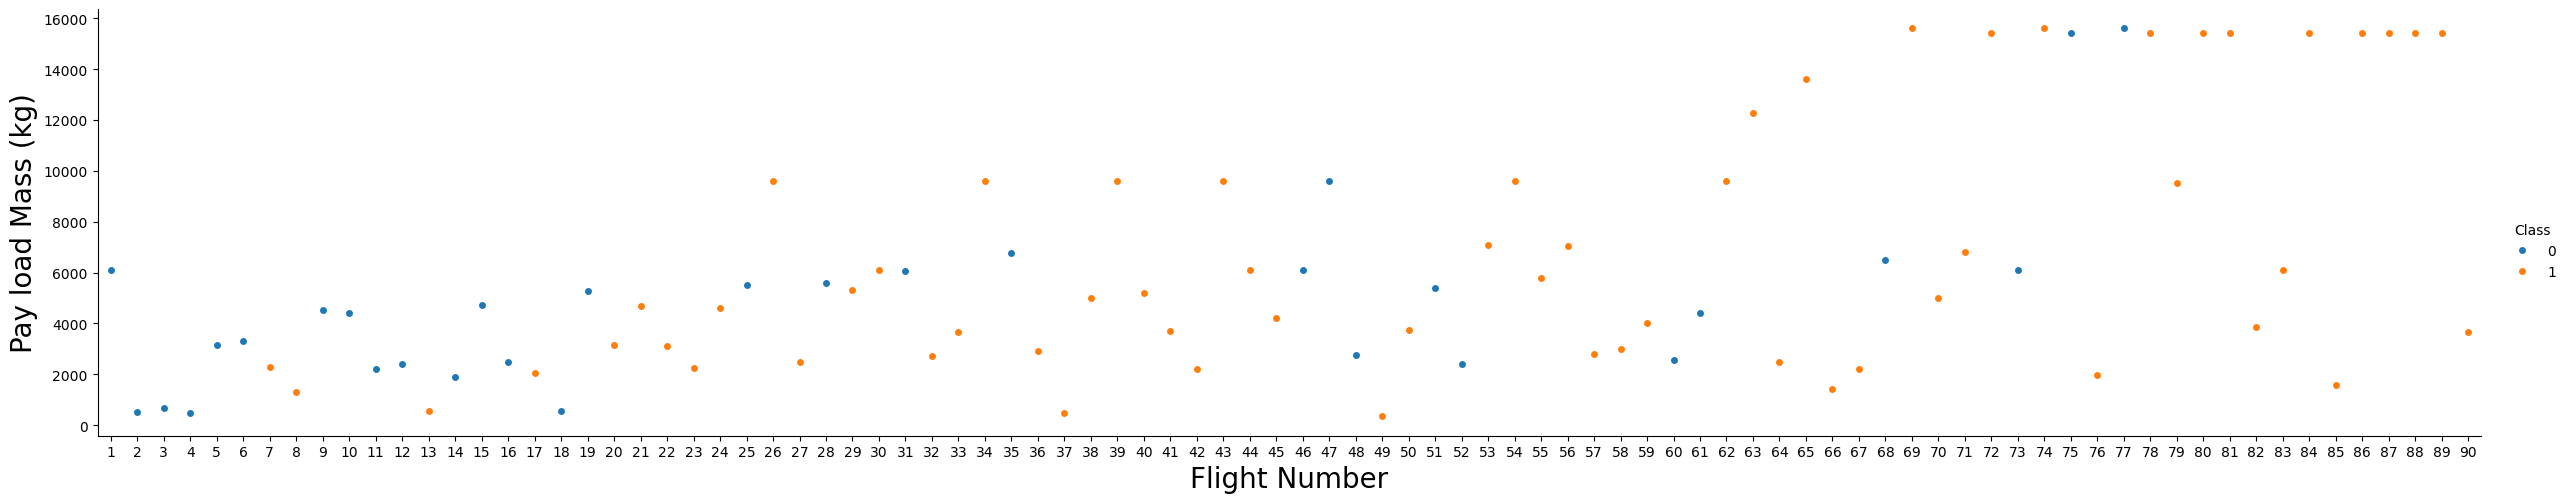

In [6]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

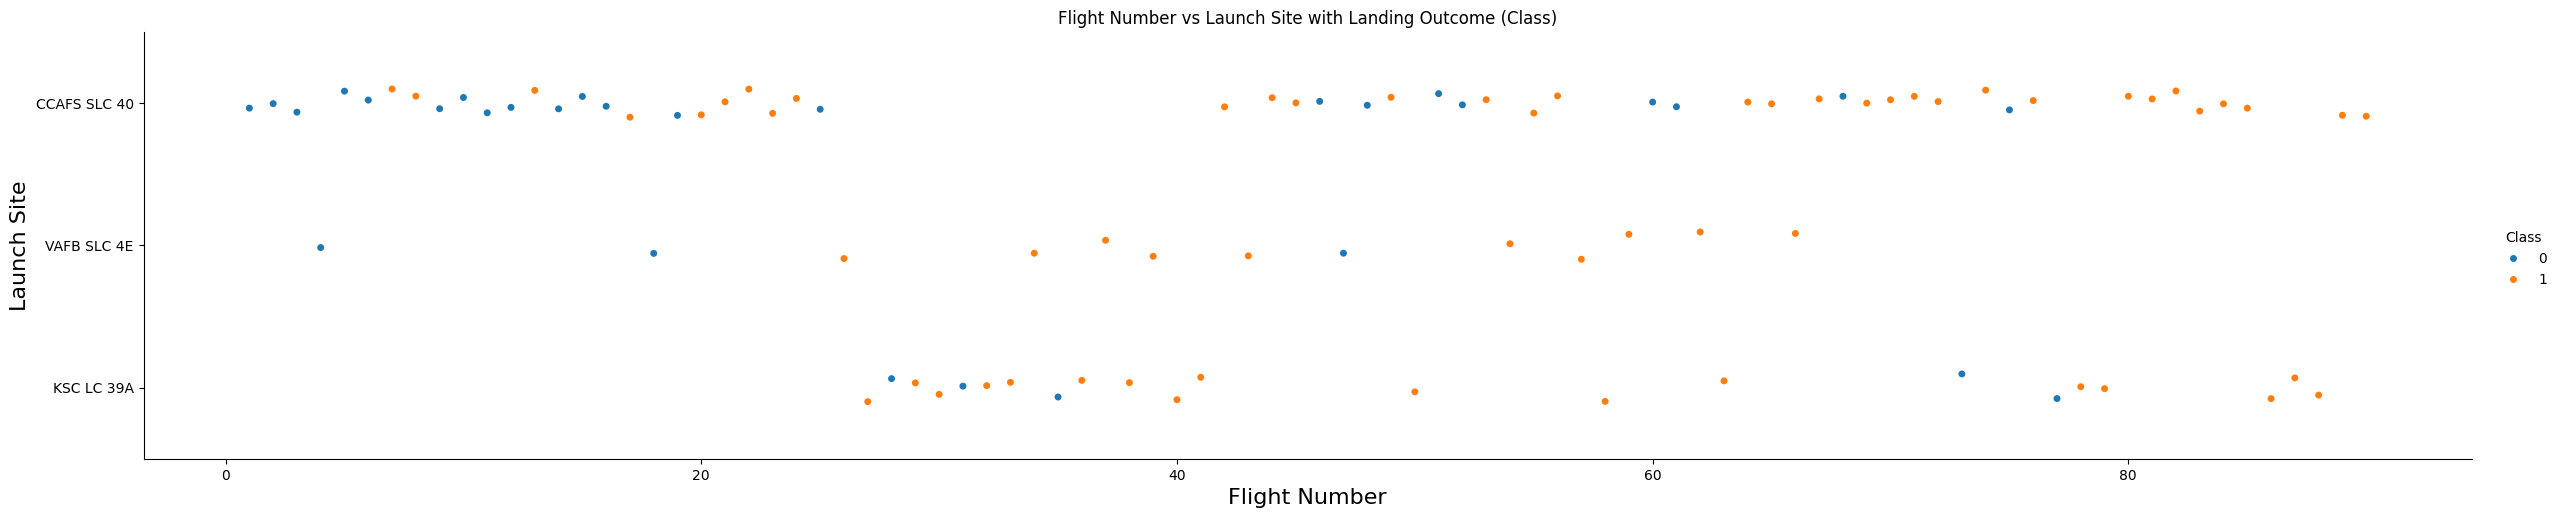

In [7]:
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=16)
plt.ylabel("Launch Site", fontsize=16)
plt.title("Flight Number vs Launch Site with Landing Outcome (Class)")
plt.show()

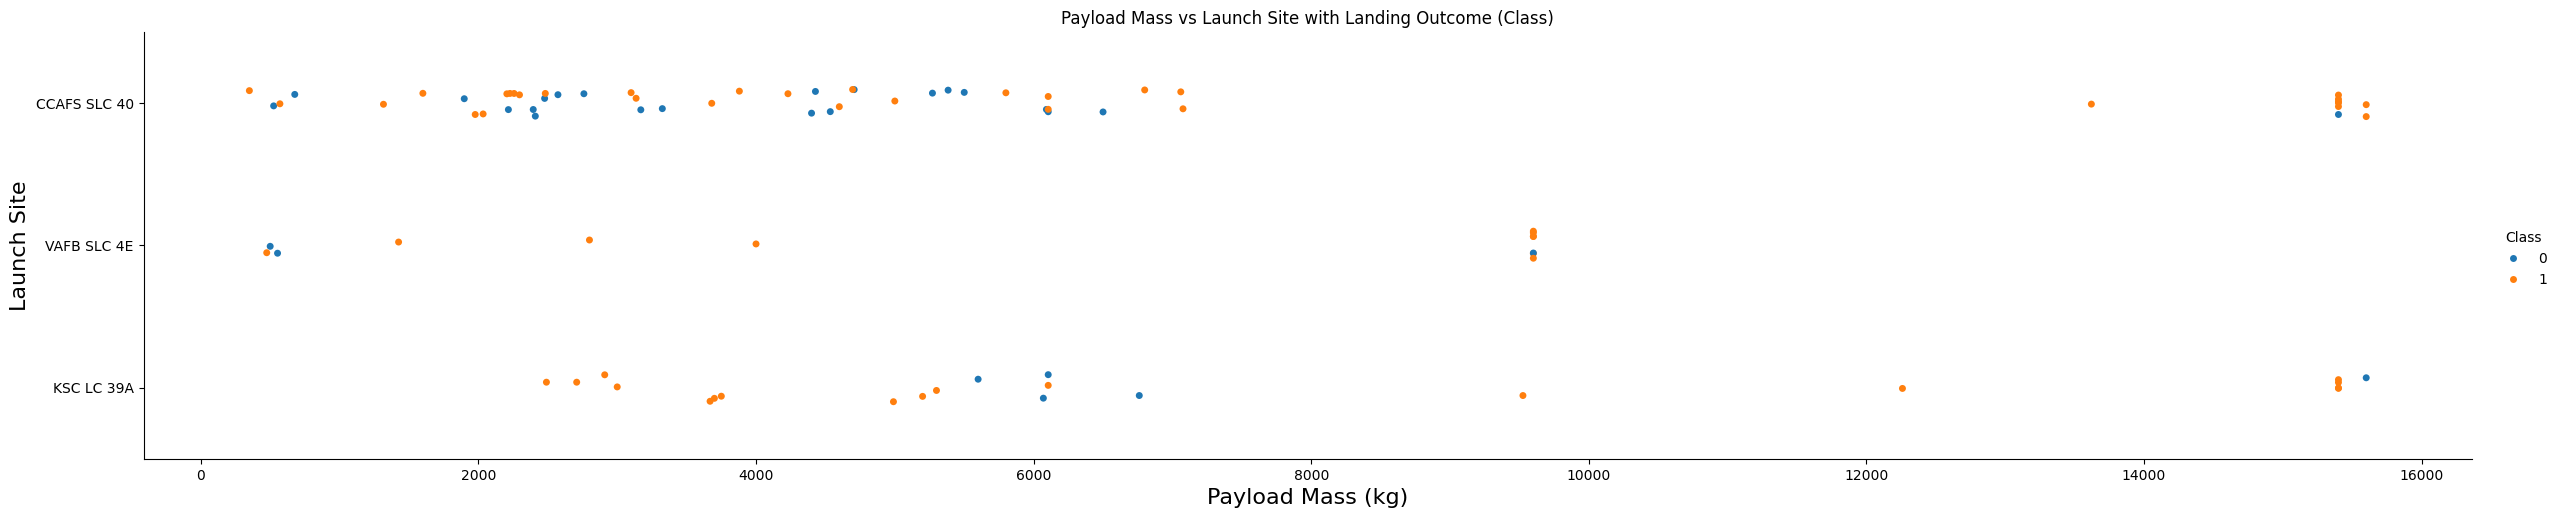

In [8]:
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect=5)
plt.xlabel("Payload Mass (kg)", fontsize=16)
plt.ylabel("Launch Site", fontsize=16)
plt.title("Payload Mass vs Launch Site with Landing Outcome (Class)")
plt.show()

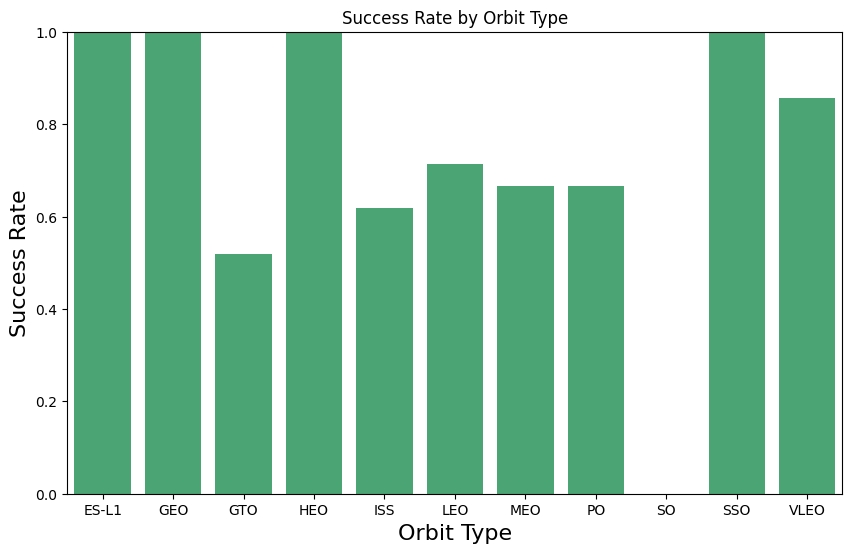

In [10]:
# Agrupar por tipo de órbita y calcular la tasa de éxito promedio
success_rate_orbit = df.groupby('Orbit')['Class'].mean().reset_index()

# Graficar la tasa de éxito por tipo de órbita
plt.figure(figsize=(10,6))
sns.barplot(x='Orbit', y='Class', data=success_rate_orbit, color='mediumseagreen')
plt.xlabel('Orbit Type', fontsize=16)
plt.ylabel('Success Rate', fontsize=16)
plt.title('Success Rate by Orbit Type')
plt.ylim(0,1)
plt.show()

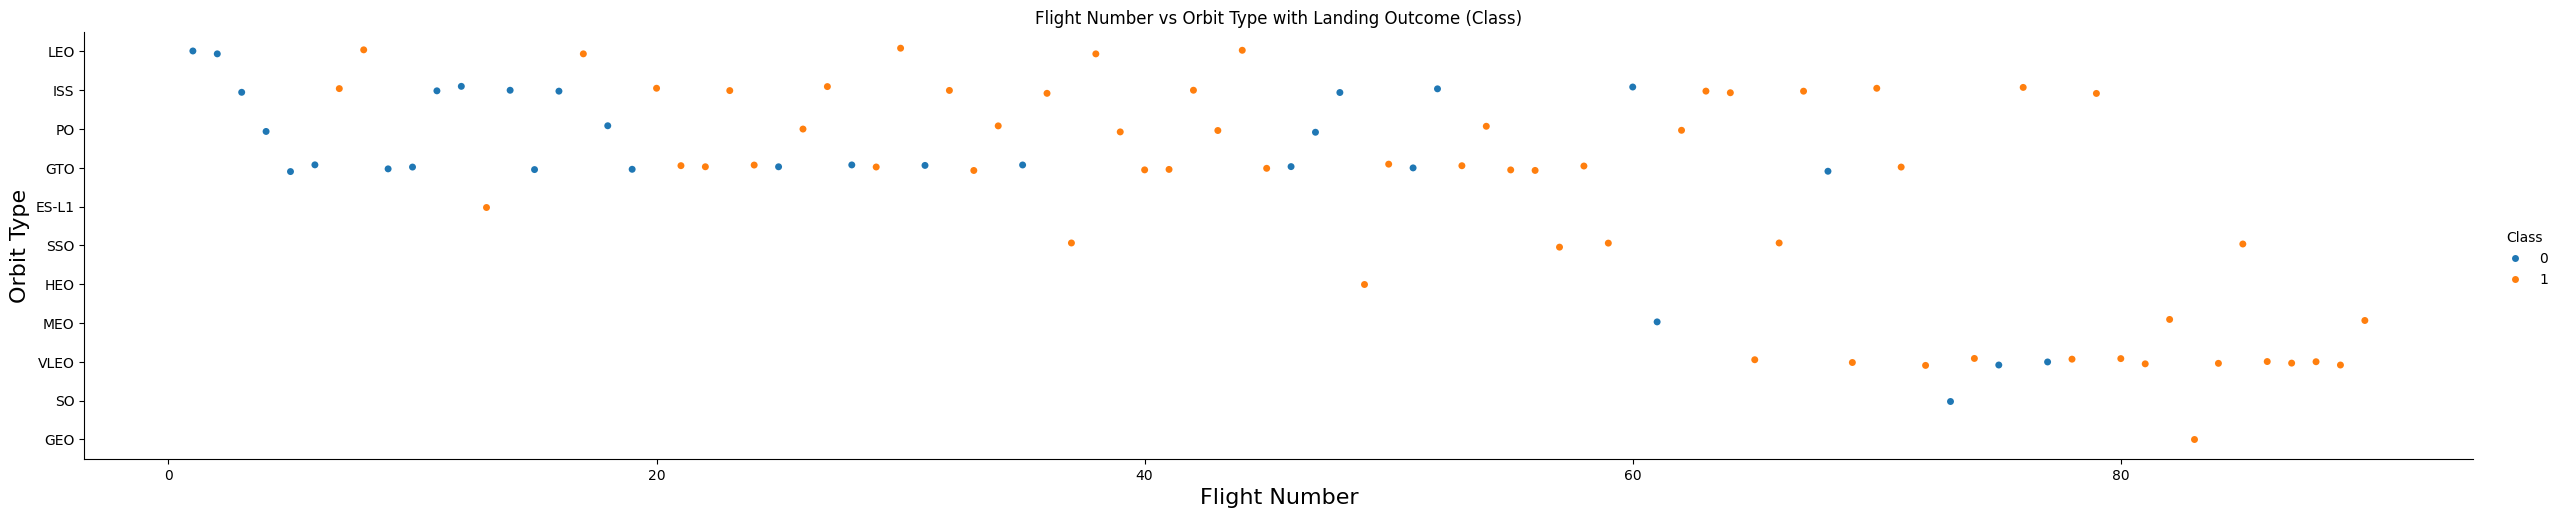

In [11]:
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=16)
plt.ylabel("Orbit Type", fontsize=16)
plt.title("Flight Number vs Orbit Type with Landing Outcome (Class)")
plt.show()

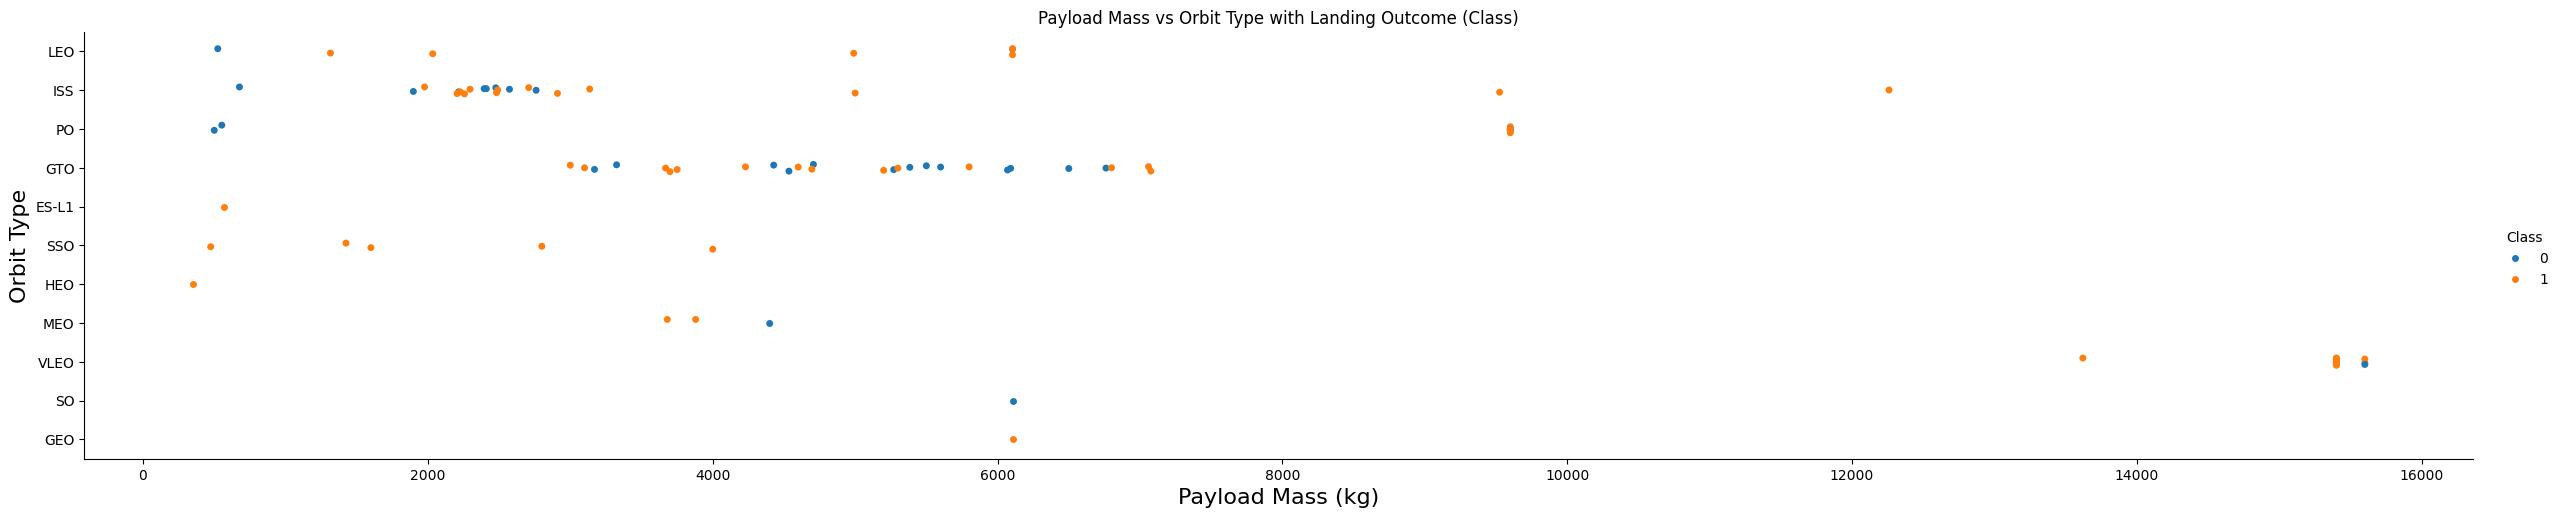

In [12]:
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, aspect=5)
plt.xlabel("Payload Mass (kg)", fontsize=16)
plt.ylabel("Orbit Type", fontsize=16)
plt.title("Payload Mass vs Orbit Type with Landing Outcome (Class)")
plt.show()

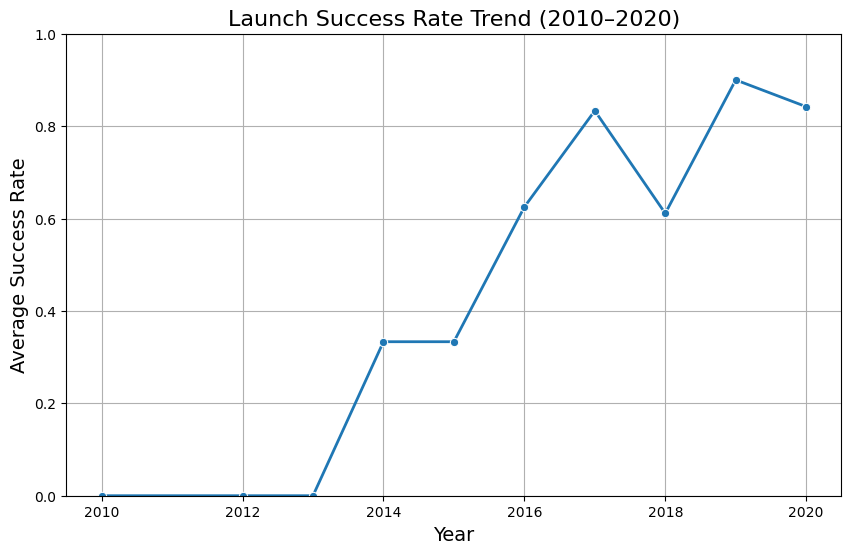

In [13]:
# Extraer el año desde la columna "Date"
df['Year'] = df['Date'].apply(lambda x: int(x.split("-")[0]))

# Agrupar por año y calcular la tasa de éxito promedio
yearly_success = df.groupby('Year')['Class'].mean().reset_index()

# Filtrar años desde 2010 en adelante
yearly_success = yearly_success[yearly_success['Year'] >= 2010]

# Graficar la tasa de éxito anual
plt.figure(figsize=(10,6))
sns.lineplot(x='Year', y='Class', data=yearly_success, marker='o', linewidth=2)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Success Rate", fontsize=14)
plt.title("Launch Success Rate Trend (2010–2020)", fontsize=16)
plt.ylim(0,1)
plt.grid(True)
plt.show()

In [14]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [15]:
# Columnas categóricas a codificar
categorical_cols = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Aplicar One-Hot Encoding a las columnas categóricas y mantener las demás columnas numéricas
features_one_hot = pd.get_dummies(features, columns=categorical_cols)

# Mostrar las primeras filas del nuevo dataframe
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
# Convertir todas las columnas a tipo float64
features_one_hot = features_one_hot.astype('float64')

# Mostrar los tipos de datos para verificar
features_one_hot.dtypes

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

In [17]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)